In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('/Users/apple/Desktop/5293/project/saartot.xlsx', header=None)
df.head()

,0,1,2,3,4
0,2019-02-28,16.56,-0.04,-0.0024,0.0
1,2019-01-31,16.60,-0.90,-0.0514,0.0
2,NaT,0.00,0.00,0.0000,0.0
3,2018-12-31,17.50,0.10,0.0057,0.0
4,2018-11-30,17.40,-0.10,-0.0057,0.0


In [3]:
car_price = df.iloc[:,0:-1]

In [4]:
car_price.columns = ['Date', 'Price', 'Change', 'Percent Change']
car_price['Date'] = car_price['Date'].astype(str)

In [5]:
car_price = car_price.loc[[i for i in range(248) if not car_price.loc[i,'Date'][0]!= '2'], :]

In [6]:
car_price.head()

,Date,Price,Change,Percent Change
0,2019-02-28,16.56,-0.04,-0.0024
1,2019-01-31,16.60,-0.90,-0.0514
3,2018-12-31,17.50,0.10,0.0057
4,2018-11-30,17.40,-0.10,-0.0057
5,2018-10-31,17.50,0.10,0.0057


In [7]:
feature_df = df.iloc[:, 0:-3]

In [8]:
feature_df.head()

,0,1
0,2019-02-28,16.56
1,2019-01-31,16.60
2,NaT,0.00
3,2018-12-31,17.50
4,2018-11-30,17.40


In [10]:
feature_df = pd.read_csv('/Users/apple/Desktop/5293/project/car_data_clean-master-2/car_data_clean.csv')

In [11]:
feature_df.head()

,Unnamed: 0,Date,Audi,BMW,Mercedes Benz,Mitsubishi Fuso,FCA,General Motors,Honda Group,Hyundai,...,Volkswagen,Volvo,Imported,Light Trucks,Domestic,Cars,Mini,Light Vehicles,Medium Duty Trucks,Hybrid/Electric/Fuel Cell Vehicles
0,9,Jan 2019,14253,18102,23721,0,136082,0,106139,42020,...,23074,5854,226484,468419,511241,252564,2457,135396,0,0
1,10,Dec 2018,22765,34357,36132,4,196520,0,155115,65721,...,32047,8826,336987,880440,938357,370718,2797,408603,6985,0
2,11,Nov 2018,17082,28330,32879,3,181310,0,120534,57499,...,26789,8181,290784,742197,802277,328741,3528,370345,6056,0
3,12,Oct 2018,16056,23262,31719,4,177391,0,122182,53025,...,29000,7327,276661,713369,794920,339215,3166,361991,6628,0
4,13,Sep 2018,19319,25908,30617,3,199819,0,132668,57359,...,30555,8715,302174,782222,854461,351203,3461,389503,6491,0


In [12]:
car_price.index = np.arange(230)

In [13]:
car_price['Direction'] = car_price['Percent Change'].apply(lambda x: 0 if x<0 else 1)

In [14]:
car_price.tail()

,Date,Price,Change,Percent Change,Direction
225,2000-05-31,17.47,-0.14,-0.0078,0
226,2000-04-30,17.61,-0.37,-0.0203,0
227,2000-03-31,17.98,-1.02,-0.0536,0
228,2000-02-29,18.99,0.70,0.0380,1
229,2000-01-31,18.30,0.40,0.0223,1


In [15]:
feature_df.columns

Index(['Unnamed: 0', 'Date', 'Audi', 'BMW', 'Mercedes Benz', 'Mitsubishi Fuso',
       'FCA', 'General Motors', 'Honda Group', 'Hyundai', 'Isuzu',
       'Jaguar Land Rover', 'Kia', 'Mazda', 'Mitsubishi', 'Nissan', 'Porsche',
       'Subaru', 'Tesla', 'Toyota Group', 'Volkswagen', 'Volvo', 'Imported',
       'Light Trucks', 'Domestic', 'Cars', 'Mini', 'Light Vehicles',
       'Medium Duty Trucks', 'Hybrid/Electric/Fuel Cell Vehicles'],
      dtype='object')

In [16]:
full_df = car_price.iloc[0:-1,:].join(feature_df,how='right',lsuffix='_dep', rsuffix='_indep')
full_df = full_df.drop(columns = 'Unnamed: 0')

In [17]:
full_df.columns

Index(['Date_dep', 'Price', 'Change', 'Percent Change', 'Direction',
       'Date_indep', 'Audi', 'BMW', 'Mercedes Benz', 'Mitsubishi Fuso', 'FCA',
       'General Motors', 'Honda Group', 'Hyundai', 'Isuzu',
       'Jaguar Land Rover', 'Kia', 'Mazda', 'Mitsubishi', 'Nissan', 'Porsche',
       'Subaru', 'Tesla', 'Toyota Group', 'Volkswagen', 'Volvo', 'Imported',
       'Light Trucks', 'Domestic', 'Cars', 'Mini', 'Light Vehicles',
       'Medium Duty Trucks', 'Hybrid/Electric/Fuel Cell Vehicles'],
      dtype='object')

### finish cleaning data
### start xgboost tree classification

In [18]:
y = full_df['Direction']
x = full_df[full_df.columns[6::]]

In [23]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
scalar = StandardScaler()

In [21]:
scalar.fit(x)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
gbm = xgb.XGBClassifier(objective = 'binary:logistic',gamma = 10, max_depth = 3)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [44]:
gbm.fit(X_train,y_train)
y_predict = gbm.predict(X_test)
accuracy_score(y_predict, y_test)

0.5434782608695652

## starts simple logistic regression

In [25]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


In [27]:

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
y_predict = clf.predict(X_test)
y_predict_proba = clf.predict_proba(X_test)
accuracy_score(y_predict, y_test)


0.45652173913043476

In [41]:
fpr, tpr, _ = roc_curve(y_test,  y_predict_proba[:,1])
auc = roc_auc_score(y_test, y_predict_proba[:,1])

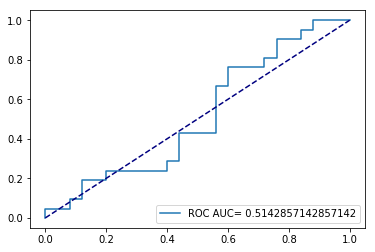

In [42]:
plt.plot(fpr,tpr,label="ROC AUC= "+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc=4)
plt.show()

start PCA for logistic regression

In [43]:
from sklearn.decomposition import PCA

In [102]:
# can change components here to improve AUC
pca = PCA(n_components=2) 
pca.fit(x)
# pca.components_  

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [103]:
new_df = pca.transform(x)

In [104]:
scalar = StandardScaler()
scalar.fit(new_df)
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.2, random_state=0)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

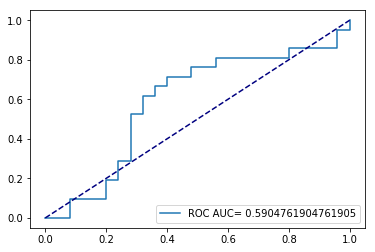

In [105]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
y_predict = clf.predict(X_test)
y_predict_proba = clf.predict_proba(X_test)
accuracy_score(y_predict, y_test)
fpr, tpr, _ = roc_curve(y_test,  y_predict_proba[:,1])
auc = roc_auc_score(y_test, y_predict_proba[:,1])
plt.plot(fpr,tpr,label="ROC AUC= "+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc=4)
plt.show()